<a href="https://colab.research.google.com/github/najlaatikahdwirahma/Health_CaseStudy-/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Definition**

Dengan  clinical parameters mengenai pasien, dapatkah kita memprediksi apakah mereka menderita penyakit jantung atau tidak?

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# **Data Preprocessing**

In [ ]:
# Mengubah nama kolom untuk memudahkan analisis
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [ ]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/dl'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/dl'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flatslping'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 0] = 'normal'
df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['st_slope'] = df['st_slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,male,typical angina,125,212,lower than 120mg/dl,ST-T wave abnormality,168,no,1.0,downsloping,2,reversable defect,0
1,53,male,typical angina,140,203,greater than 120mg/dl,normal,155,yes,3.1,upsloping,0,reversable defect,0
2,70,male,typical angina,145,174,lower than 120mg/dl,ST-T wave abnormality,125,yes,2.6,upsloping,0,reversable defect,0
3,61,male,typical angina,148,203,lower than 120mg/dl,ST-T wave abnormality,161,no,0.0,downsloping,1,reversable defect,0
4,62,female,typical angina,138,294,greater than 120mg/dl,ST-T wave abnormality,106,no,1.9,flatslping,3,fixed defect,0


In [ ]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'st_slope',
 'thalassemia']

In [ ]:
continues_cols = df.select_dtypes(include='number').columns.tolist()
continues_cols

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression',
 'num_major_vessels',
 'target']

In [ ]:
for col in categorical_cols:
    print(df[col].unique())

['male' 'female']
['typical angina' 'atypical angina' 'non-anginal pain' 'asymptomatic']
['lower than 120mg/dl' 'greater than 120mg/dl']
['ST-T wave abnormality' 'normal' 'left ventricular hypertrophy']
['no' 'yes']
['downsloping' 'upsloping' 'flatslping']
['reversable defect' 'fixed defect' 'normal']


# **Exploratory Data Analysis (EDA)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_colors = ["#337ab7","#8b0000","#c6b34e","#95354a", "#57b9a8","#b0ddff", "#426872","#215c97", "#02b6b4","#b05468","#cd9f62","#aaaaaa","#8fce00","#827861","#426872"]
# Create a seaborn palette object
my_palette = sns.color_palette(my_colors)
# Use the custom palette with a seaborn function
sns.set_palette(my_palette)
# sns.set(style='dark', palette='cubehelix')
%matplotlib inline

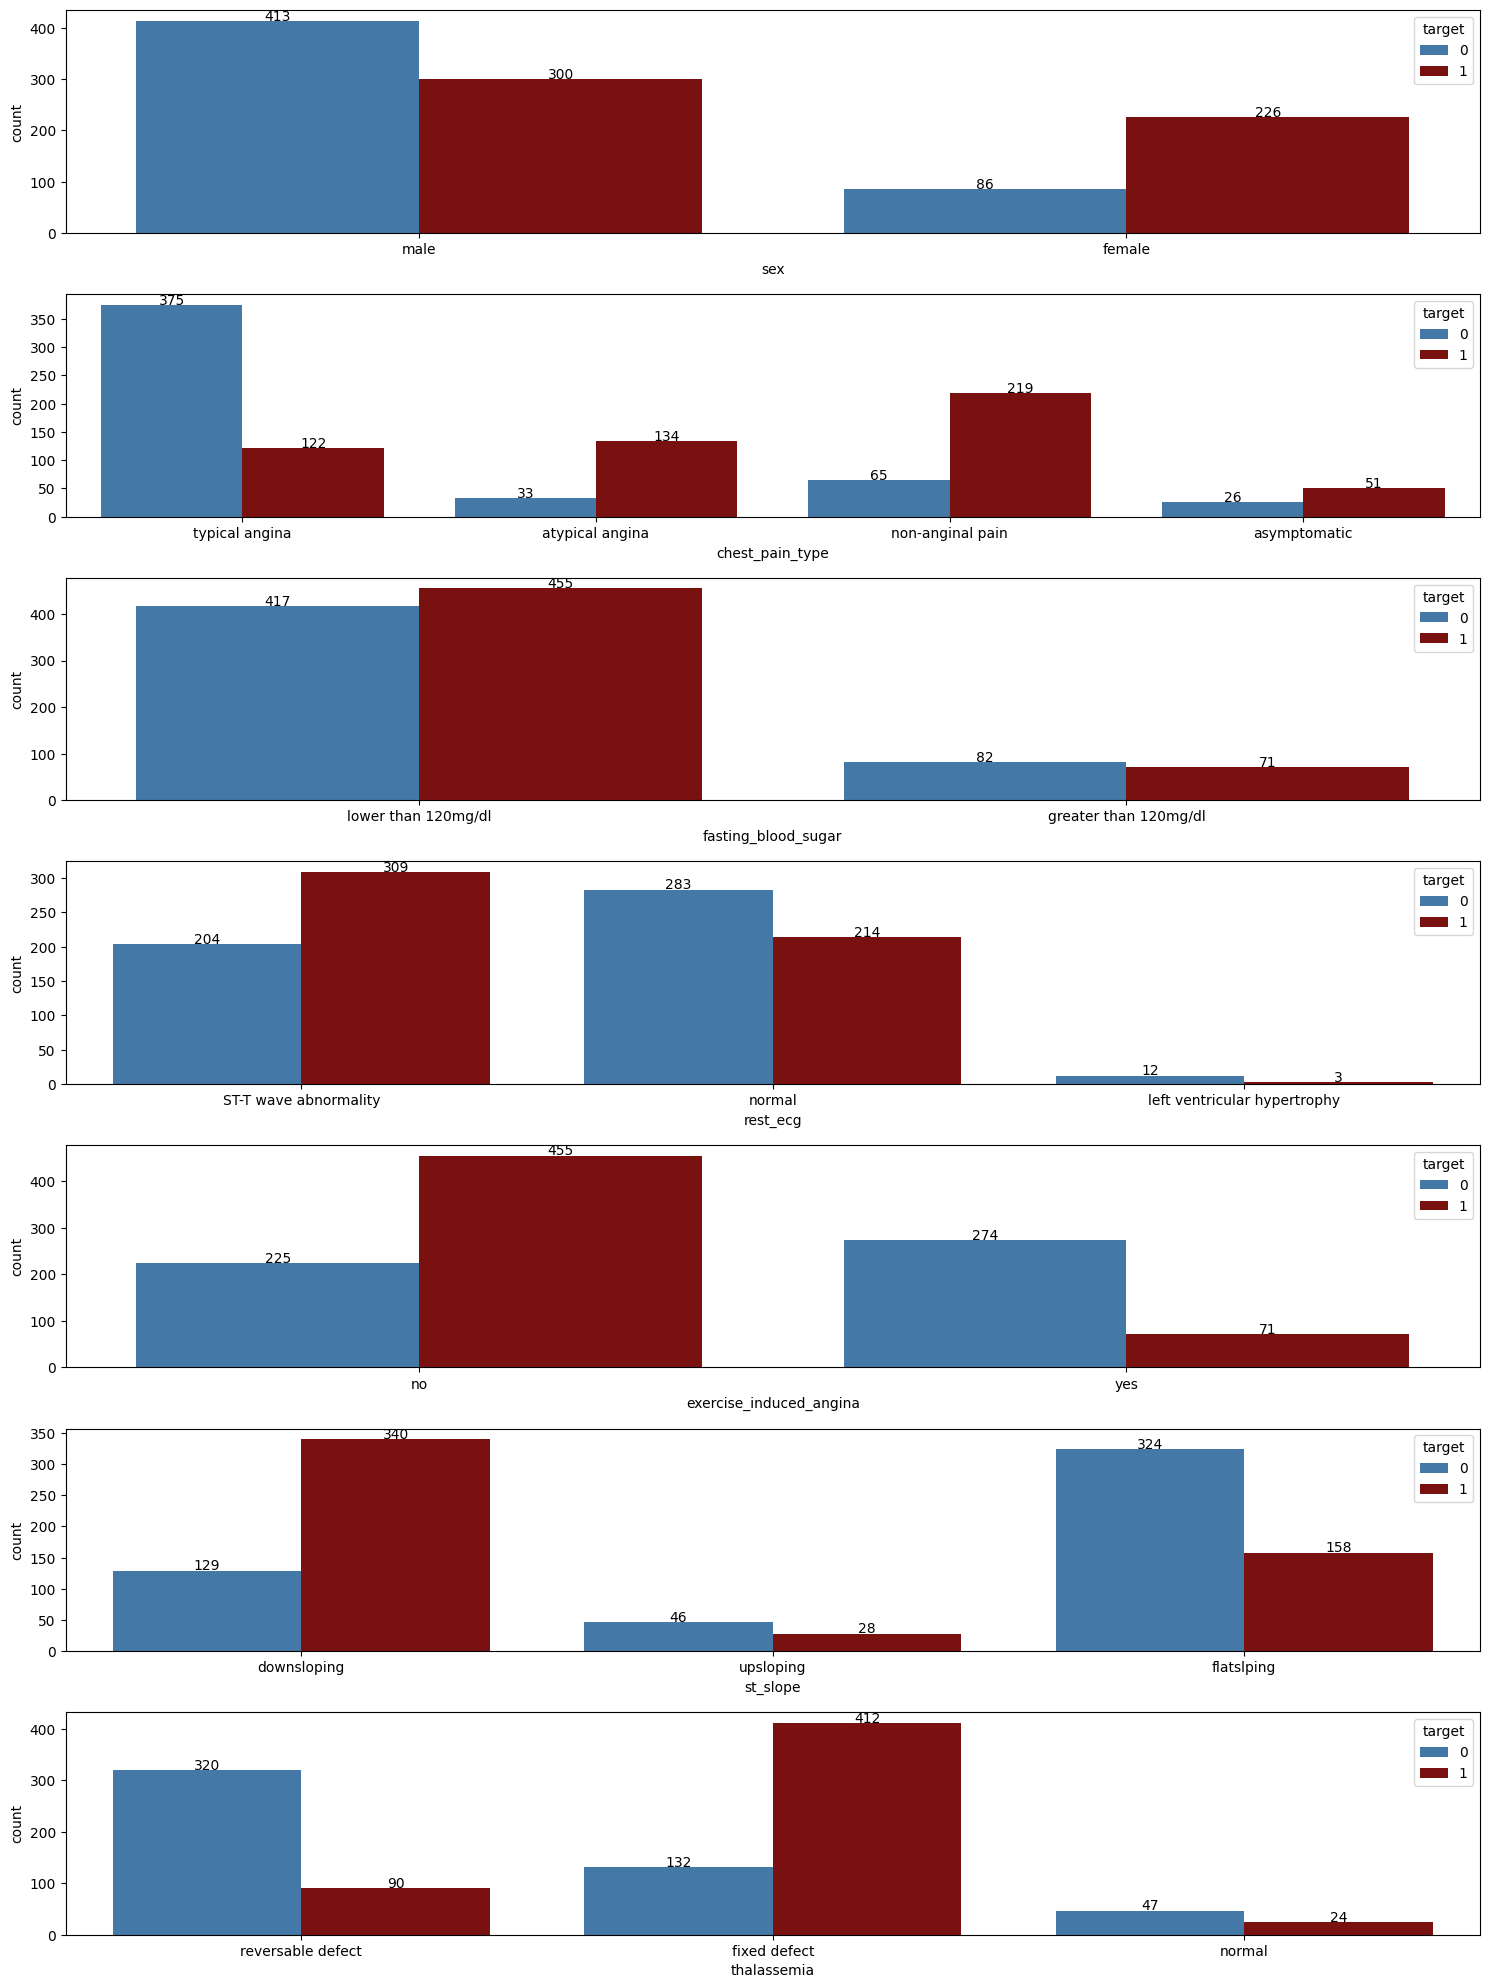

In [ ]:
fig, axs = plt.subplots(len(categorical_cols), figsize=(15, 20))

# Iterate over categorical columns and plot bar charts
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='target', data=df, ax=axs[i])
#     axs[i].set_title(col)
    for p in axs[i].patches:
        axs[i].annotate(format(p.get_height(),'.0f'), (p.get_x() + 0.2, p.get_height() + 1), ha='center')

# Adjust spacing between subplots
plt.tight_layout()

# Show plot
plt.show()

Insights :


* **sex** : Pria lebih mungkin memiliki penyakit jantung daripada Wanita.
* **chest_pain_type** : Orang dengan chest pain type dalam kelompok ['typical angina' 'atypical angina' 'non-anginal pain'] lebih mungkin memiliki penyakit jantung daripada orang dengan chest pain type dalam kelompok ['asymptomatic'].
* **fasting_blood_sugar** : Orang dalam kelompok fasting blood sugar 'lower than 120mg/dl' lebih mungkin memiliki penyakit jantung daripada orang dalam kelompok fasting blood sugar 'greater than 120mg/dl'.
* **rest_ecg** : Orang yang berada dalam kelompok (normal, ST-T wave abnormality) lebih mungkin memiliki penyakit jantung.
* **exercise_induced_angina** : Orang dalam kelompok (No for exercice induced angina) lebih banyak memiliki penyakit jantung dibandingkan orang dalam kelompok (Yes for exercice induced angina)
* **st_slope** : Orang dalam kelompok (Downslopins: tanda-tanda jantung tidak sehat) dan orang dalam kelompok (Upsloping: detak jantung lebih baik dengan latihan) lebih mungkin memiliki penyakit jantung daripada orang dalam kelompok (Flatsloping: perubahan minimal (tipikal jantung sehat).
* **thalassemia** : Orang yang berada dalam kelompok (fixed defect) lebih mungkin memiliki penyakit jantung.



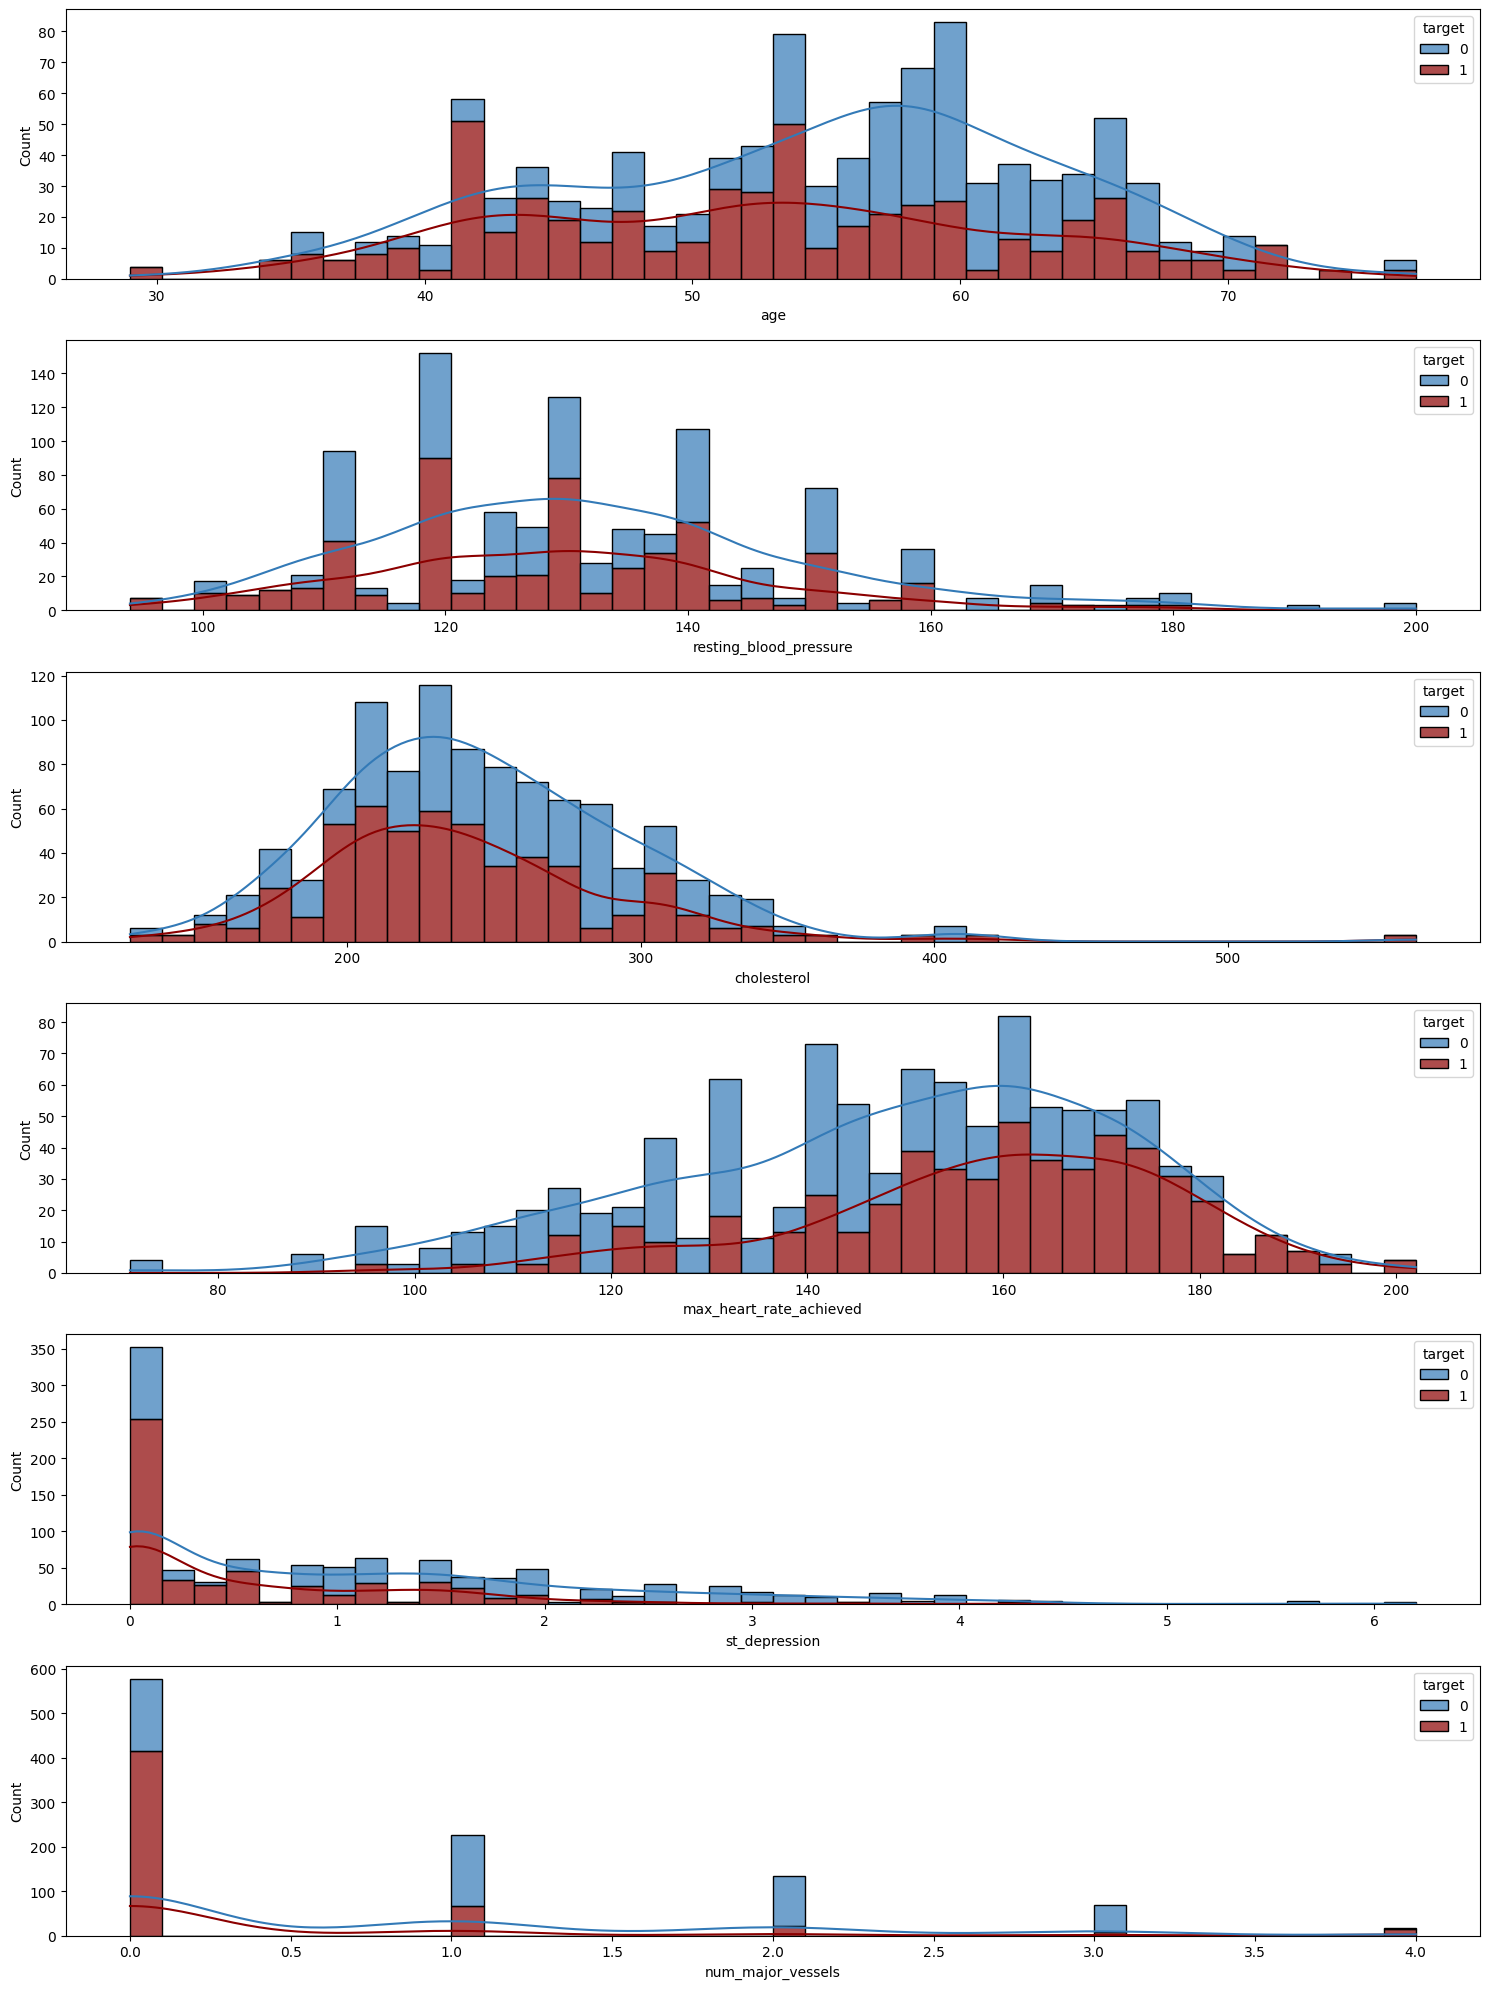

In [ ]:
fig, axs = plt.subplots(6, figsize=(15, 20))

# Melakukan perulangan pada kolom kategorikal dan plot diagram batang
for i, col in enumerate([col for col in continues_cols if col != 'target']):
   sns.histplot(data=df, x=col, hue='target', kde=True, ax=axs[i], alpha=0.7, multiple='stack', bins=40)

plt.tight_layout()
plt.show()

Insights :


* **age** : Tidak ada tren khusus untuk usia.
* **resting_blood_pressure** : Tekanan darah istirahat seseorang (mmHg saat masuk ke rumah sakit) antara 120-140 patut dikhawatirkan.
* **cholesterol** : Pengukuran kolesterol seseorang dalam mg/dl di atas 190 patut dikhawatirkan.
* **max_heart_rate_achieved** : Orang yang mencapai detak jantung lebih dari 150 lebih mungkin memiliki penyakit jantung.
* **st_depressiona** : ST depression rendah yang disebabkan oleh exercise relative to rest looks at stress of heart selama olahraga jantung yang tidak sehat akan lebih stres.
* **num_major_vessels** : Orang dengan 0 pembuluh darah utama lebih mungkin memiliki penyakit.


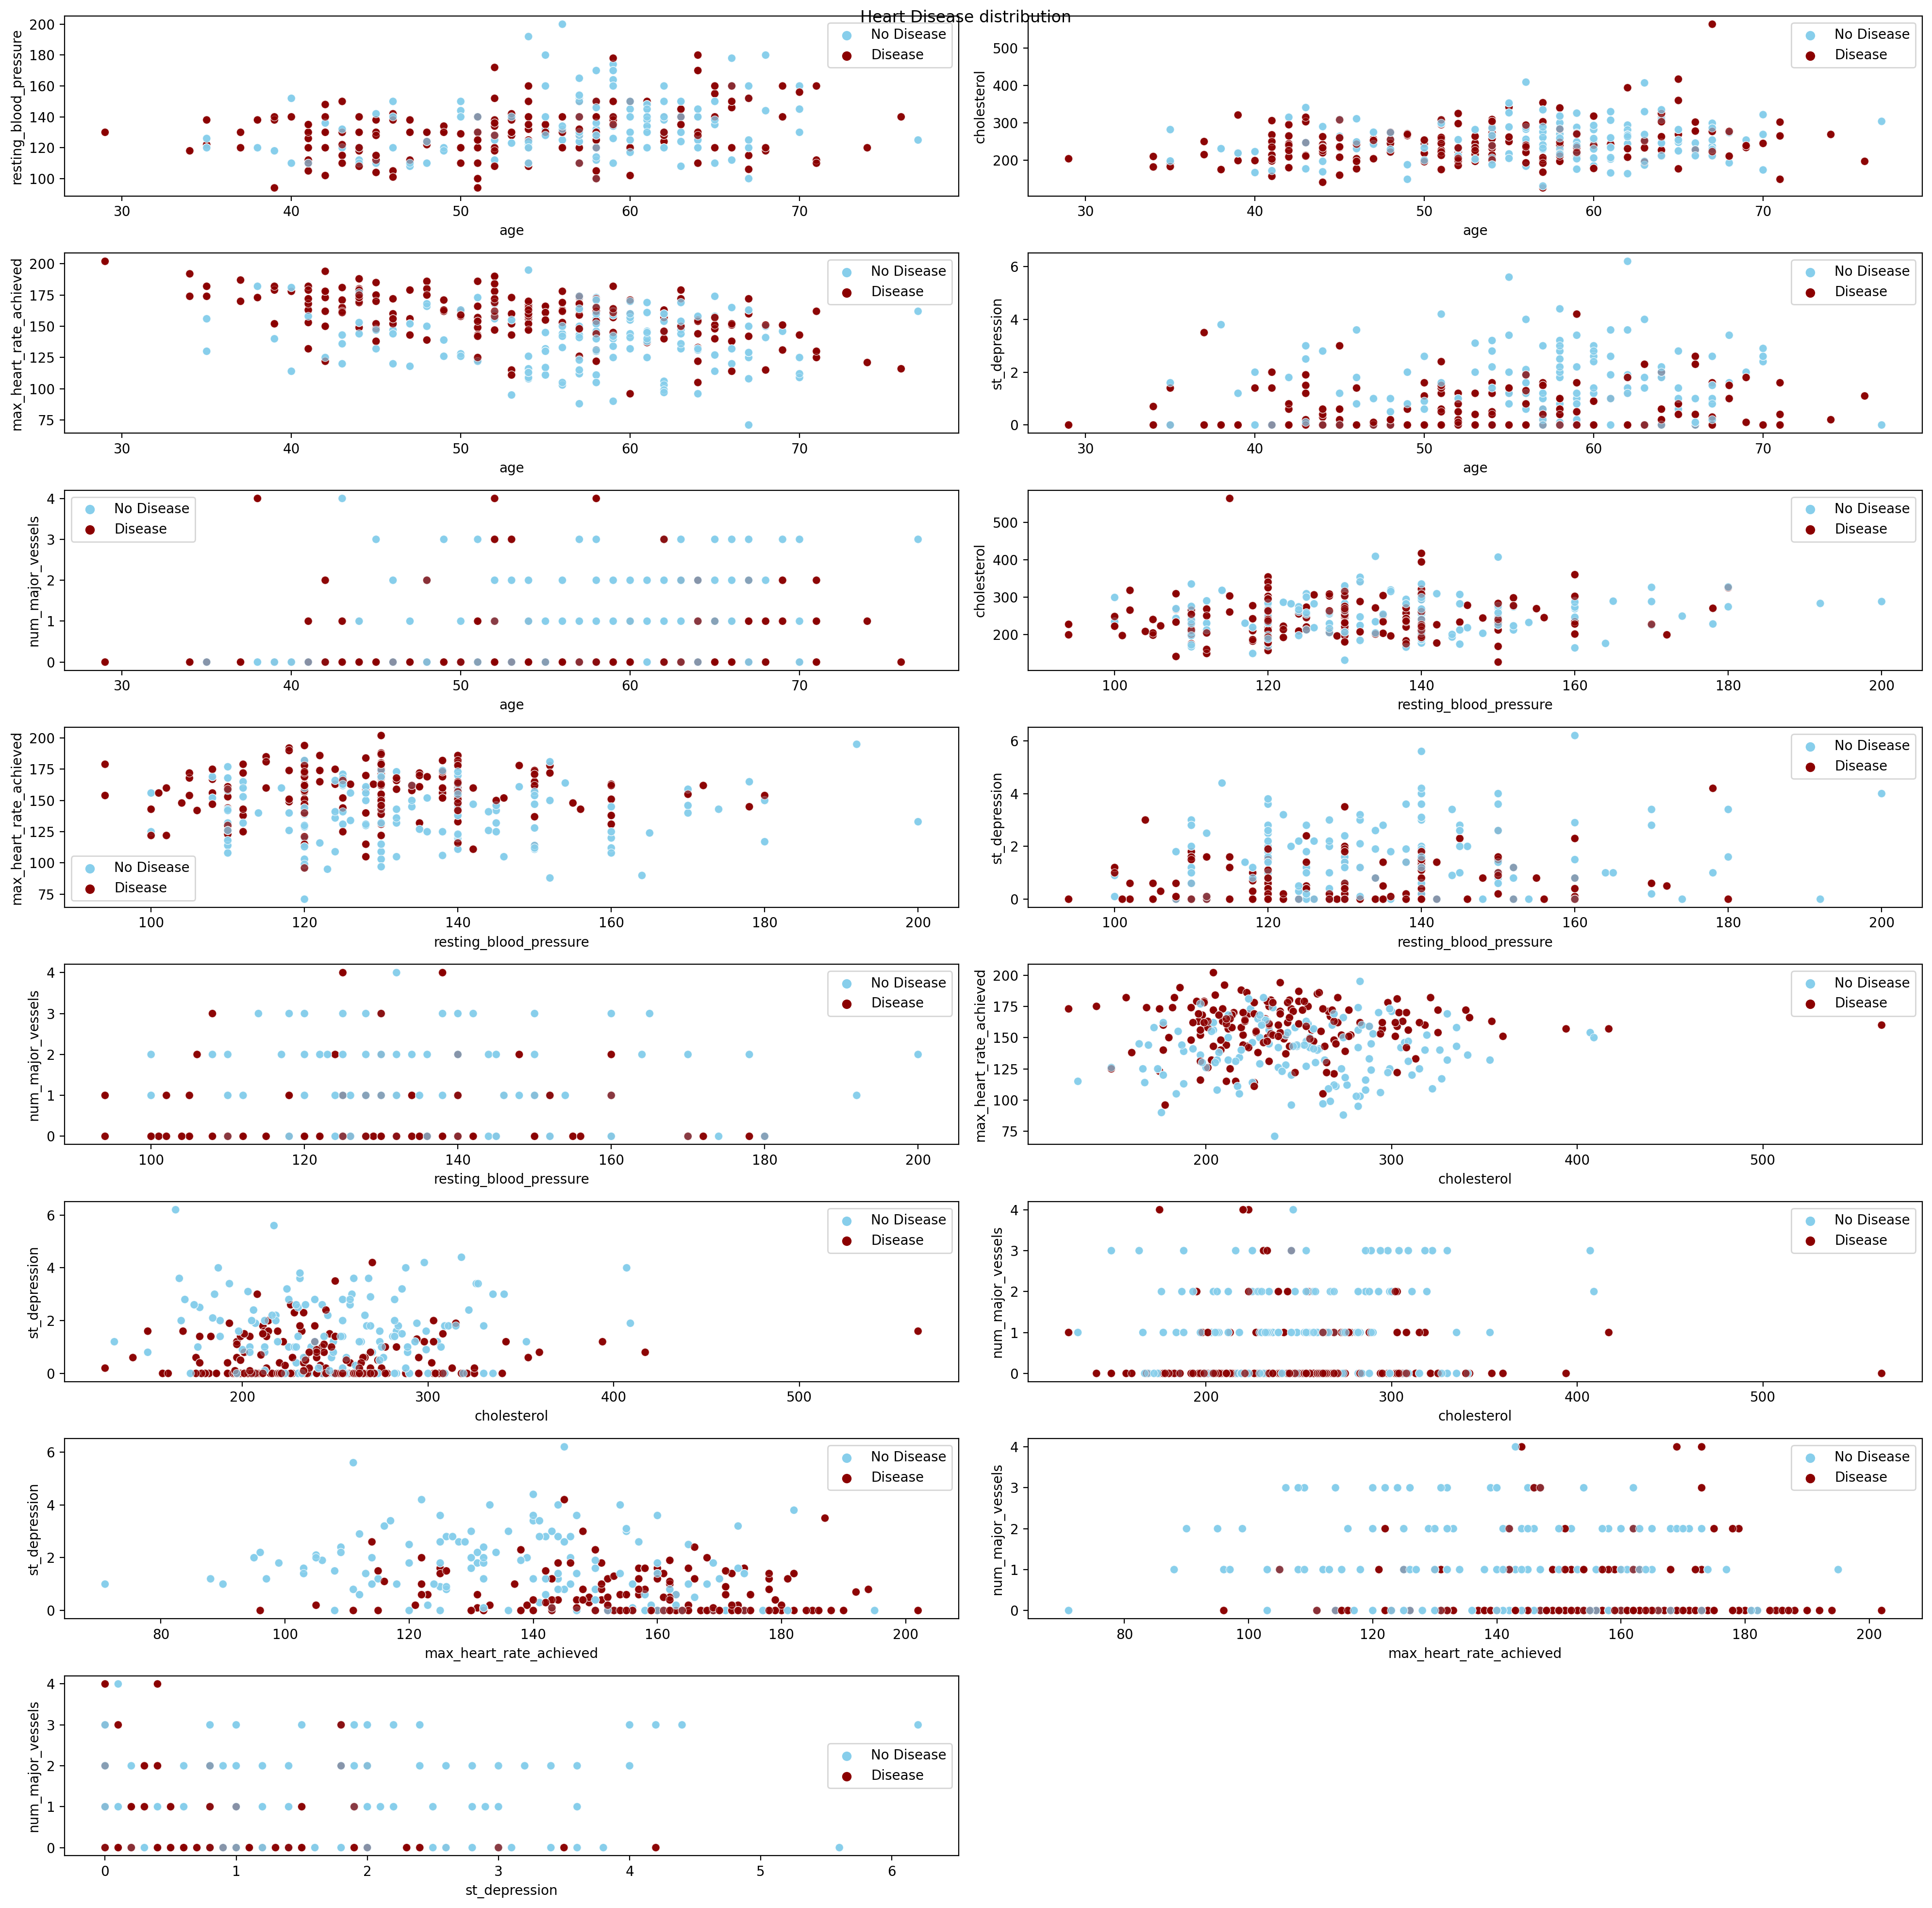

In [ ]:
import itertools

columns = [col for col in continues_cols if col != 'target']
colors = {0: 'skyblue', 1: 'darkred'}
combinations = itertools.combinations(columns, 2)

fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(20, 20),dpi=200)

for i, (x_col, y_col) in enumerate(combinations):
    row = i // 2
    col = i % 2
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='target', alpha=0.7, palette=colors, ax=axs[row][col])
    axs[row][col].set_xlabel(x_col)
    axs[row][col].set_ylabel(y_col)
    legend = axs[row][col].legend()
    legend.texts[0].set_text('No Disease')
    legend.texts[1].set_text('Disease')
    plt.suptitle("Heart Disease distribution")
    axs.flatten()[-1].set_visible(False)

plt.tight_layout()
plt.show()

<Axes: >

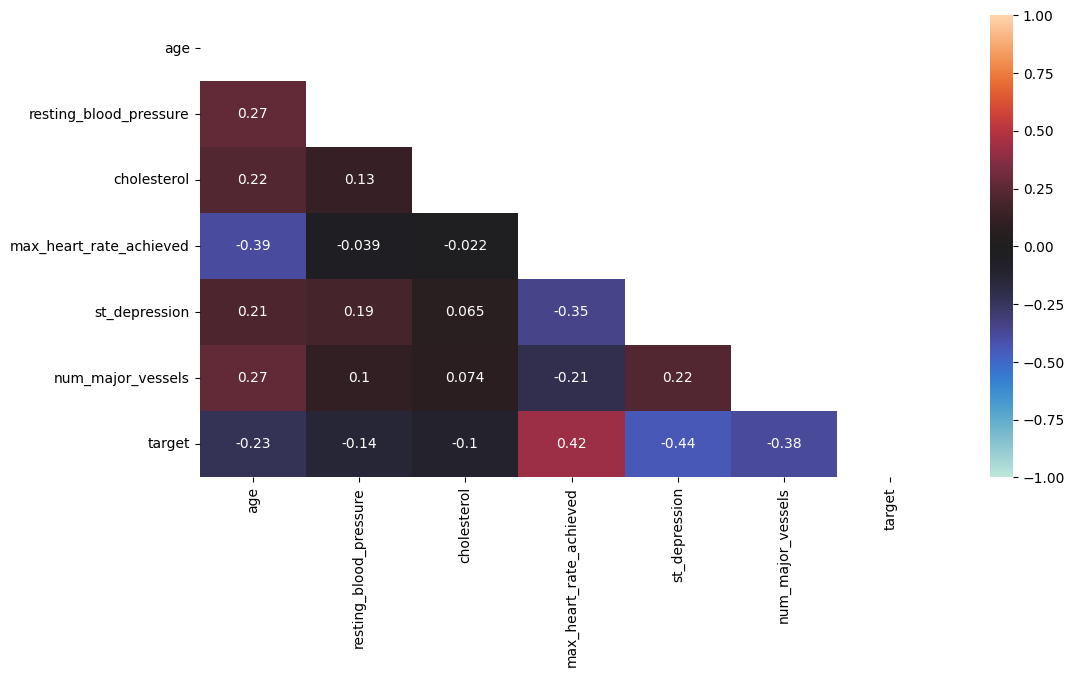

In [ ]:
feature_corr = df.corr()
mask = np.zeros_like(feature_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,6))
sns.heatmap(feature_corr, annot=True, mask=mask, vmin=-1, vmax=1, center=0)

<Axes: >

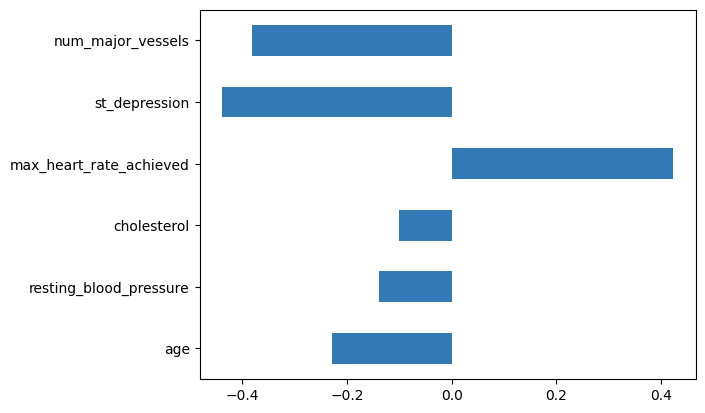

In [ ]:
df.drop('target', axis=1).corrwith(df['target']).plot(kind='barh')

# **Data Preparations for Modeling**

Perlu mengubah variabel kategorikal menjadi variabel dummy dan scale numeric features sebelum melatih model Machine Learning.

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/dl,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flatslping,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,0,1,0,0,1,1,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,0,0,1,0,0,1,1,0,1,0,1
2,70,145,174,125,2.6,0,0,1,0,0,1,1,0,0,1,0,1,0,1
3,61,148,203,161,0.0,1,0,1,0,0,1,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
df.dtypes

age                                          int64
resting_blood_pressure                       int64
cholesterol                                  int64
max_heart_rate_achieved                      int64
st_depression                              float64
num_major_vessels                            int64
target                                       int64
sex_male                                     uint8
chest_pain_type_atypical angina              uint8
chest_pain_type_non-anginal pain             uint8
chest_pain_type_typical angina               uint8
fasting_blood_sugar_lower than 120mg/dl      uint8
rest_ecg_left ventricular hypertrophy        uint8
rest_ecg_normal                              uint8
exercise_induced_angina_yes                  uint8
st_slope_flatslping                          uint8
st_slope_upsloping                           uint8
thalassemia_normal                           uint8
thalassemia_reversable defect                uint8
dtype: object

In [ ]:
# Memisahkan data menjadi features dan target
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/dl,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flatslping,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
835,-0.585840,-0.779454,-1.935031,-1.019094,-0.210661,2.171691,1,0,1,0,1,0,1,0,0,0,0,0
137,1.051477,2.741732,1.610634,0.202882,-0.912152,-0.725467,0,0,0,1,1,0,0,1,0,0,0,0
534,-0.040068,-1.347387,0.442176,0.770228,-0.912152,-0.725467,0,0,1,0,1,0,1,0,0,0,0,0
495,0.505705,0.186033,-0.222636,0.508376,-0.473720,-0.725467,1,0,0,1,1,0,0,0,1,0,0,1
244,-0.367531,-0.381900,-0.001032,0.726586,1.192321,-0.725467,1,0,1,0,0,0,1,0,1,0,0,0


# **GradientBoosting Classifier**

In [ ]:
param_GBC={
    'n_estimators':[10,50,100],
    'learning_rate':[0.01,0.1,1,10]
}
param_RF={
    'n_estimators':[50,100,200],
    'max_depth':[2,4,6]
}

In [ ]:
model_GBC=GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=param_GBC,cv=5,scoring='accuracy')
model_GBC.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [ ]:
GBCModel=model_GBC.best_estimator_

In [ ]:
GBCModel.score(X_train,y_train)

1.0

In [ ]:
GBCModel.score(X_test,y_test)

0.9853658536585366

In [ ]:
y_pred_GBC = GBCModel.predict(X_test_scaled)
print(classification_report(y_test, y_pred_GBC))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# **Random Forest**

In [ ]:
model_RF=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_RF,cv=5,scoring='accuracy')
model_RF.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
RFModel=model_RF.best_estimator_

In [ ]:
RFModel.score(X_train,y_train)

0.9719512195121951

In [ ]:
RFModel.score(X_test,y_test)

0.9024390243902439

In [ ]:
y_pred_RF = RFModel.predict(X_test_scaled)
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



# **Logistic Regression**

In [ ]:
model_LR=LogisticRegression()
model_LR.fit(X_train,y_train)

LogisticRegression()

In [ ]:
model_LR.score(X_train,y_train)

0.8768292682926829

In [ ]:
model_LR.score(X_test,y_test)

0.8097560975609757

In [ ]:
y_pred_LR = model_LR.predict(X_test_scaled)
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.93      0.54      0.68       102
           1       0.68      0.96      0.80       103

    accuracy                           0.75       205
   macro avg       0.81      0.75      0.74       205
weighted avg       0.80      0.75      0.74       205



# **Feature Importance**

In [ ]:
# Mendefinisikan classifiers yang akan digunakan
classifiers = [
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
]

# Menentukan parameter distributions untuk setiap classifier
param_distributions = [
    # Gradient Boosting
    {
        'n_estimators': [50, 100, 500, 1000],
        'learning_rate': np.logspace(-4, 0, 5),
        'max_depth': [3, 5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    },
    # Random Forest
    {
        'n_estimators': [100, 500, 1000],
        'max_depth': [3, 5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    },
    # Logistic Regression
    {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': np.logspace(-4, 4, 20),
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 1000, 10000]
    }
]

Classifier 1/3: GradientBoostingClassifier


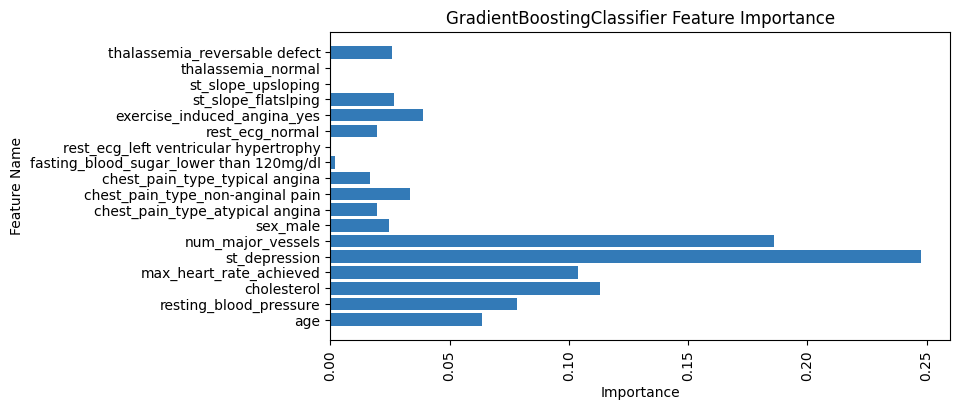

Classifier 2/3: RandomForestClassifier


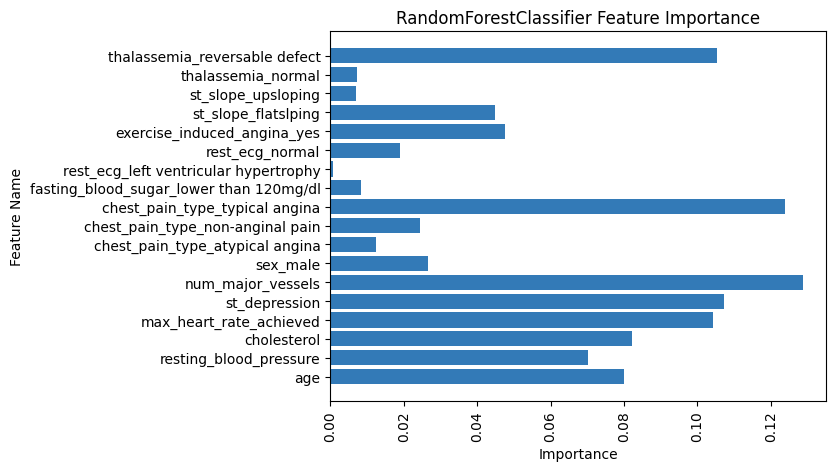

Classifier 3/3: LogisticRegression


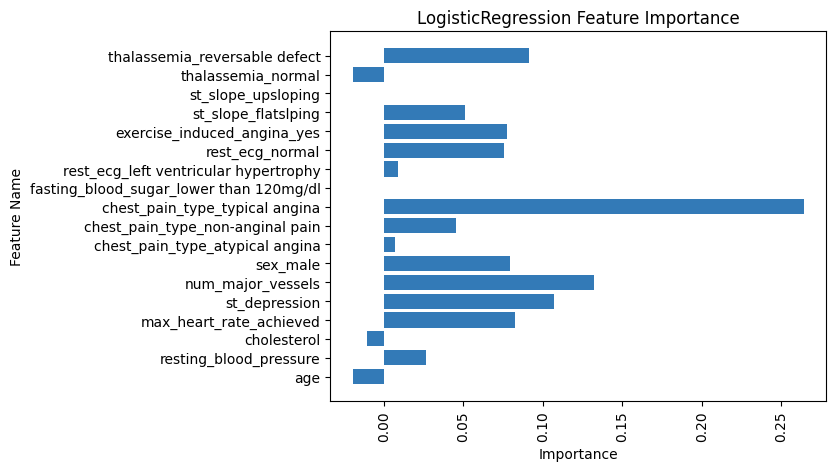

In [ ]:
# Menentukan metrik penilaian yang akan digunakan
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
plt.figure(figsize=(8,4))
# Melakukan pencarian acak untuk setia[] classifier
tuned_scores = pd.DataFrame()
for i, clf in enumerate(classifiers):
    print(f"Classifier {i+1}/{len(classifiers)}: {clf.__class__.__name__}")
    random_search = RandomizedSearchCV(
        clf,
        param_distributions[i],
        scoring=scoring,
        n_iter=50,
        cv=5,
#         n_jobs=-1
        random_state=42,
        refit='accuracy'
    )
    random_search.fit(X_train, y_train)
    row = {
        'classifier': clf.__class__.__name__,
        'best_score': random_search.best_score_,
        'best_params': random_search.best_params_
    }
    for score in scoring:
        row[score] = random_search.cv_results_[f"mean_test_{score}"][random_search.best_index_]

    # Mengevaluasi classifier terbaik pada data uji
    y_pred = random_search.predict(X_test)
    row['test_accuracy'] = accuracy_score(y_test, y_pred)
    row['test_precision_macro'] = precision_score(y_test, y_pred, average='macro')
    row['test_recall_macro'] = recall_score(y_test, y_pred, average='macro')
    row['test_f1_macro'] = f1_score(y_test, y_pred, average='macro')

    # Mengevaluasi feature importance untuk classifier terbaik
    if hasattr(random_search.best_estimator_, 'feature_importances_'):
        feature_importances = random_search.best_estimator_.feature_importances_
        feature_names = X_train.columns
    else:
        # Menggunakan permutation importance untuk compute feature importance
        result = permutation_importance(
            random_search.best_estimator_, X_test, y_test, n_repeats=10, random_state=42)

        feature_importances = result.importances_mean
        feature_names = X_train.columns
    if feature_importances is not None:
        feature_importances = feature_importances / np.sum(feature_importances)
        row.update(dict(zip(feature_names, feature_importances)))
        # Memvisualisasikan feature importance
        plt.barh(feature_names, feature_importances)
#         plt.bar(feature_names, feature_importances)
        plt.xlabel('Importance')
        plt.ylabel('Feature Name')
        plt.title(f'{clf.__class__.__name__} Feature Importance')
        plt.xticks(rotation=90)
        plt.show()

    tuned_scores = tuned_scores.append(row, ignore_index=True)